In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def detect_edges(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred_image = cv2.GaussianBlur(grayscale_image, (5,5), 0)
    edges = cv2.Canny(blurred_image, 60, 150)
    return edges

In [ ]:
def region_of_interest(image):
    height = image.shape[0]
    vertices = np.array([(200, height), (1100, height), (550, 250)]) # Vertices in Triangle -> Left(200, Height), (1100, Height), (550, 2500)
    mask = np.zeros_like(image) # Create an array with the same dimensions as original image, containing all 0s
    cv2.fillPoly(mask, np.int32([vertices]), 255) # Fill Mask With Pixel Vlaues of 255 (White)
    # If you get an error, convert numpy array data type from int64-bit numbers to int32
    masked_image = cv2.bitwise_and(image, mask) # Use BitWise Operation to Compare Two Images and Return Region of Interest
    return masked_image

In [ ]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
    return line_image

In [ ]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - intercept) / slope) # The function: [x = (y-b) / x] is derived from the function: [y = mx+b]
    x2 = int((y2 - intercept)/ slope)
    return np.array([x1, y1, x2, y2])

In [ ]:
def average_slope_intercept(image, lines):
    left_fit = [] # Coordinates from lines on left-side of lane
    right_fit = [] # Coordinates from lines on right-side of lane
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1,y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_avg = np.average(left_fit, axis=0)
    right_fit_avg = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_avg)
    right_line = make_coordinates(image, right_fit_avg)
    return np.array([left_line, right_line])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  59705      0 --:--:-- --:--:-- --:--:-- 60453


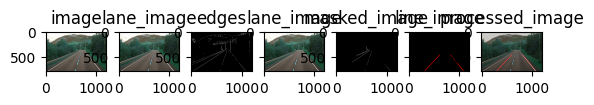

In [ ]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
image = cv2.imread('/content/Road_in_Norway.jpg')
lane_image = np.copy(image)
edges = detect_edges(lane_image) # Generated Edges using Canny Edge Detection Algorithm
region = region_of_interest(edges)
masked_image = region_of_interest(edges)
detected_lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)  # 1 Degree to Radians --> Pi/180
averaged_lines = average_slope_intercept(lane_image, detected_lines)
line_image = display_lines(lane_image, averaged_lines)
processed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

plt.subplot(1,7,1)
plt.imshow(image,cmap='gray')
plt.title('image')
plt.subplot(1,7,2)
plt.imshow(lane_image,cmap='gray')
plt.title('lane_image')
plt.subplot(1,7,3)
plt.imshow(edges,cmap='gray')
plt.title('edges')
plt.subplot(1,7,4)
plt.imshow(region,cmap='gray')
plt.title('region')
plt.imshow(lane_image,cmap='gray')
plt.title('lane_image')
plt.subplot(1,7,5)
plt.imshow(masked_image,cmap='gray')
plt.title('masked_image')
plt.subplot(1,7,6)
plt.imshow(line_image,cmap='gray')
plt.title('line_image')
plt.subplot(1,7,7)
plt.imshow(processed_image,cmap='gray')
plt.title('processed_image')

plt.show()

# cv2_imshow(image)
# cv2_imshow(lane_image)
# cv2_imshow(edges)
# cv2_imshow(region)
# cv2_imshow(masked_image)
# cv2_imshow(detected_lines)
# cv2_imshow(averaged_lines)
# cv2_imshow(line_image)
# cv2_imshow(processed_image)


In [ ]:
cap=cv2.VideoCapture('/content/driving_camera(1).mp4')
fps=cap.get(cv2.CAP_PROP_FPS)
print(fps)
while (True):
    rec,frame=cap.read()
    print(f"Frame: {frame}")
    edges = detect_edges(frame)
    cropped_image = region_of_interest(edges)
    detected_lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, detected_lines)
    line_image = display_lines(frame, averaged_lines)
    processed_image = cv2.addWeighted(frame, 0.8, line_image, 1,1)
    cv2_imshow( processed_image)

    keyexit = cv2.waitKey(5) & 0xFF
    if keyexit == 27:
        break

cv2.destroyAllWindows()
cap.release()